# Object detection

Object detection is one kind of image recognitions; it detects object regions as rectangles and classifies the detected regions.

Here we tries to use Single Shot Multibox Detector ( https://arxiv.org/abs/1512.02325 ).

We just to use the pretrained model and test the human detection.

### Prerequisite

You need to down load the pretrained model **weights_SSD300.hdf5** [here](https://mega.nz/#F!7RowVLCL!q3cEVRK9jyOSB9el3SssIA)  and put it on /work/notebooks/trained_models/. <br>
This model is provided by [this repository](https://github.com/rykov8/ssd_keras).

### Import modules.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import numpy as np
from scipy.misc import imread
import sys

from ssd import SSD300
from ssd_utils import BBoxUtility

Using TensorFlow backend.


We assume you have already downloaded the trained model and stored it in **"/work/notebooks/trained_models/"**.

The test image we use here is taken from [here]( https://ja.wikipedia.org/wiki/%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB:People_waiting_at_bus_stop.jpg).

### Define some functions.

In [2]:
def create_overlay(img, results, voc_classes, plt_fname):
    """
    Create a visualization of the found objects in img.
    Paramters
    ---------
    img : numpy array
        Original array
    results : numpy array
        Found objects
    voc_classes : list of strings
        Names of the classes in Pascal VOC.
    plt_fname : string
        Path where the visualization gets stored.
    """
    plt.clf()
    # Parse the outputs.
    det_label = results[:, 0]
    det_conf = results[:, 1]
    det_xmin = results[:, 2]
    det_ymin = results[:, 3]
    det_xmax = results[:, 4]
    det_ymax = results[:, 5]

    # Get detections with confidence higher than 0.5.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.5]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()
    currentAxis.axis('off')

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax - xmin + 1, ymax - ymin + 1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor': color, 'alpha': 0.5})
    plt.savefig(plt_fname)


def main(img_paths):
    """
    Detect objects in images.
    Parameters
    ----------
    img_paths : list of strings
    """
    # Load the model
    voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
                   'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
                   'Dog', 'Horse', 'Motorbike', 'Person', 'Pottedplant',
                   'Sheep', 'Sofa', 'Train', 'Tvmonitor']
    NUM_CLASSES = len(voc_classes) + 1
    input_shape = (300, 300, 3)
    model = SSD300(input_shape, num_classes=NUM_CLASSES)
    model.load_weights('../trained_models/weights_SSD300.hdf5', by_name=True)
    bbox_util = BBoxUtility(NUM_CLASSES)

    # Load the inputs
    inputs = []
    images = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(300, 300))
        img = image.img_to_array(img)
        images.append(imread(img_path))
        inputs.append(img.copy())
    inputs = preprocess_input(np.array(inputs))

    # Predict
    preds = model.predict(inputs, batch_size=1, verbose=1)
    results = bbox_util.detection_out(preds)

    # Visualize
    for i, img in enumerate(images):
        create_overlay(img, results[i], voc_classes, "{}-det.png".format(
            img_paths[i].split(".jpg")[-2]
        ))


# def get_parser():
#     """Get parser object."""
#     from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
#     parser = ArgumentParser(description=__doc__,
#                             formatter_class=ArgumentDefaultsHelpFormatter)
#     parser.add_argument("-f", "--file",
#                         dest="filename",
#                         help="Detect objects in image",
#                         metavar="IMAGE")
#     parser.add_argument("--folder",
#                         dest="folder",
#                         help="Detect objects in JPG images in folder",
#                         metavar="FOLDER")
#     return parser

### Test.

1/1 [==============================] - 0s


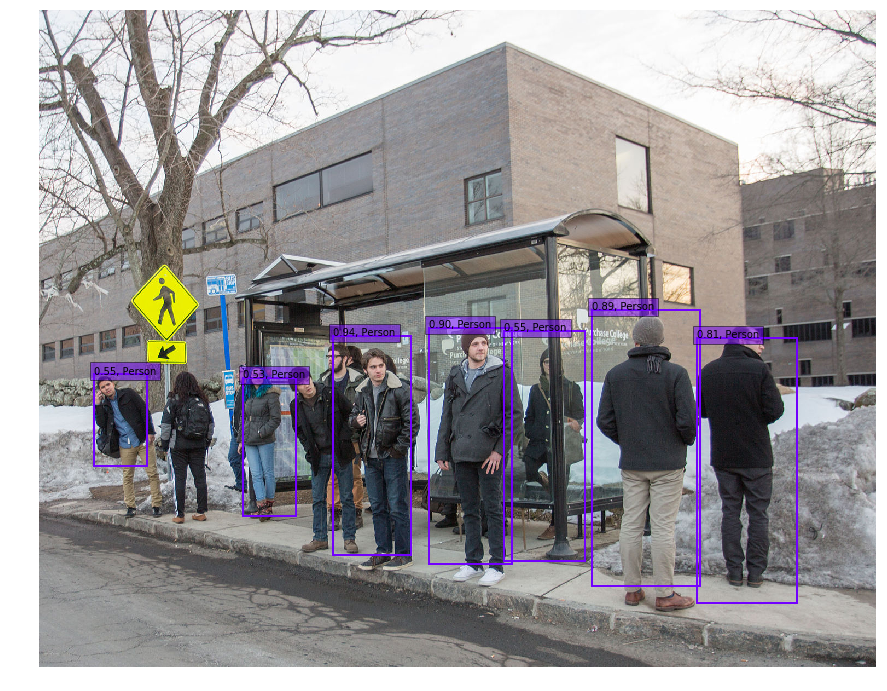

In [3]:
plt.figure(figsize = (15,15))
main(["./object_detection.jpg"])